In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objects as go

In [15]:
df = pd.read_csv(r'D:\1\ALY6150\4\Group Project\6FeatureIntegrationDatasets.csv')
df.head(5)

,State,Year,Race,Gender,Age Group Code,heart disease Deaths,heart disease Population,heart disease Crude Rate,breath Deaths,breath Population,breath Crude Rate,cancer Deaths,cancer Population,cancer Crude Rate,total Deaths,total Population,total Crude Rate,Tobacco Use Rate,Overweight (BMI 25.0-29.9),Obese (BMI 30.0 - 99.8),Normal Weight (BMI 18.5-24.9)
0,Alabama,2011,Black or African American,Male,45-54,15,79607,18.8,29,79607,36.4,129,79607,162.0,737,79607,925.8,0.023535,0.042143,0.049219,0.019468
1,Alabama,2011,Black or African American,Male,55-64,13,64821,20.1,66,64821,101.8,378,64821,583.1,1279,64821,1973.1,0.020311,0.045665,0.047146,0.018614
2,Alabama,2011,White,Female,45-54,13,249596,5.2,70,249596,28.0,313,249596,125.4,1101,249596,441.1,0.063442,0.039856,0.036010,0.027951
3,Alabama,2011,White,Male,45-54,23,247666,9.3,88,247666,35.5,358,247666,144.5,1687,247666,681.2,0.059746,0.050964,0.036577,0.022249
4,Alabama,2011,White,Male,55-64,20,222503,9.0,249,222503,111.9,1005,222503,451.7,3070,222503,1379.8,0.051562,0.055222,0.035036,0.021274


In [16]:
# generating addtional variables(sum deaths of the 3 kinds of disease, sum crude rate of the 3 kinds of disease) # crude rate means deaths in 100000
df['total death of the 3 kinds of disease'] = df.apply(lambda row: row['heart disease Deaths'] + row['breath Deaths'] + row['cancer Deaths'], axis=1)
df['total crude rate of the 3 kinds of disease'] = df.apply(lambda row: row['heart disease Crude Rate'] + row['breath Crude Rate'] + row['cancer Crude Rate'], axis=1)
df

,State,Year,Race,Gender,Age Group Code,heart disease Deaths,heart disease Population,heart disease Crude Rate,breath Deaths,breath Population,breath Crude Rate,cancer Deaths,cancer Population,cancer Crude Rate,total Deaths,total Population,total Crude Rate,Tobacco Use Rate,Overweight (BMI 25.0-29.9),Obese (BMI 30.0 - 99.8),Normal Weight (BMI 18.5-24.9),total death of the 3 kinds of disease,total crude rate of the 3 kinds of disease
0,Alabama,2011,Black or African American,Male,45-54,15,79607,18.8,29,79607,36.4,129,79607,162.0,737,79607,925.8,0.023535,0.042143,0.049219,0.019468,173,217.2
1,Alabama,2011,Black or African American,Male,55-64,13,64821,20.1,66,64821,101.8,378,64821,583.1,1279,64821,1973.1,0.020311,0.045665,0.047146,0.018614,457,705.0
2,Alabama,2011,White,Female,45-54,13,249596,5.2,70,249596,28.0,313,249596,125.4,1101,249596,441.1,0.063442,0.039856,0.036010,0.027951,396,158.6
3,Alabama,2011,White,Male,45-54,23,247666,9.3,88,247666,35.5,358,247666,144.5,1687,247666,681.2,0.059746,0.050964,0.036577,0.022249,469,189.3
4,Alabama,2011,White,Male,55-64,20,222503,9.0,249,222503,111.9,1005,222503,451.7,3070,222503,1379.8,0.051562,0.055222,0.035036,0.021274,1274,572.6
5,Alabama,2012,Black or African American,Male,55-64,22,67105,32.8,63,67105,93.9,390,67105,581.2,1274,67105,1898.5,0.007351,0.043724,0.056376,0.014947,475,707.9
6,Alabama,2012,White,Female,55-64,15,234592,6.4,244,234592,104.0,653,234592,278.4,1957,234592,834.2,0.019815,0.037720,0.041262,0.025485,912,388.8
7,Alabama,2012,White,Male,55-64,24,222238,10.8,264,222238,118.8,939,222238,422.5,3089,222238,1390.0,0.018660,0.049750,0.038479,0.020584,1227,552.1
8,Alabama,2013,Black or African American,Female,55-64,16,83878,19.1,57,83878,68.0,286,83878,341.0,891,83878,1062.3,0.032865,0.040818,0.052096,0.018759,359,428.1
9,Alabama,2013,Black or African American,Male,55-64,28,68838,40.7,82,68838,119.1,399,68838,579.6,1384,68838,2010.5,0.030951,0.053895,0.047346,0.015445,509,739.4


In [17]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,1516,49,Texas,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1516.0,NaN,NaN,NaN,2013.222955,1.777498,2011.0,2011.75,2013.0,2015.0,2016.0
Race,1516,4,White,976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1516,2,Male,836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age Group Code,1516,5,65+,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart disease Deaths,1516.0,NaN,NaN,NaN,82.509894,134.004938,10.0,19.0,38.0,83.0,1595.0
heart disease Population,1516.0,NaN,NaN,NaN,338010.986148,378064.871533,1352.0,92694.5,211220.5,418215.5,2216416.0
heart disease Crude Rate,1516.0,NaN,NaN,NaN,116.941953,174.193736,0.7,9.875,26.05,172.6,1237.6
breath Deaths,1516.0,NaN,NaN,NaN,567.598945,1175.683347,10.0,45.0,127.0,389.5,9503.0
breath Population,1516.0,NaN,NaN,NaN,338010.986148,378064.871533,1352.0,92694.5,211220.5,418215.5,2216416.0


In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
important_features = ['Age Group Code','heart disease Crude Rate','breath Crude Rate','cancer Crude Rate','total Crude Rate']

In [19]:
df.groupby(['Gender'])[important_features].describe().transpose()

Gender                                Female          Male
heart disease Crude Rate count    680.000000    836.000000
                         mean     135.302794    102.007297
                         std      184.487915    163.949495
                         min        0.900000      0.700000
                         25%        7.600000     11.400000
                         50%       25.250000     26.350000
                         75%      230.750000    130.650000
                         max     1019.500000   1237.600000
breath Crude Rate        count    680.000000    836.000000
                         mean     701.857647    713.583254
                         std      873.124341   1131.473383
                         min        2.800000      1.300000
                         25%       29.275000     21.175000
                         50%       71.900000     68.100000
                         75%     1478.525000   1201.125000
                         max     2835.000000   3983.100000
cancer Crude Rate        count    680.000000    836.000000
                         mean    1140.753088   1376.290789
                         std     1245.031723   1915.593086
                         min       24.300000      5.800000
                         25%      133.825000    108.175000
                         50%      301.200000    317.150000
                         75%     2584.550000   2582.875000
                         max     3665.300000   6532.300000
total Crude Rate         count    680.000000    836.000000
                         mean    7320.582647   6544.395335
                         std     8597.365923   9453.858360
                         min       93.700000    112.700000
                         25%      456.650000    519.250000
                         50%      886.950000   1021.800000
                         75%    17826.775000  13933.075000
                         max    22282.900000  27644.100000

In [20]:
df.groupby(['Year'])[important_features].describe().transpose()

Year                                    2011          2012          2013  \
heart disease Crude Rate count    379.000000    253.000000    203.000000   
                         mean     113.616359    108.784190     95.024631   
                         std      165.125327    160.717273    147.840421   
                         min        0.900000      0.700000      1.300000   
                         25%        9.650000      8.800000      9.400000   
                         50%       24.400000     23.000000     25.200000   
                         75%      164.400000    165.400000    132.950000   
                         max      918.100000    861.400000   1035.500000   
breath Crude Rate        count    379.000000    253.000000    203.000000   
                         mean     745.105541    673.134387    664.423153   
                         std     1077.939012    995.888924   1002.001418   
                         min        2.200000      1.400000      1.900000   
                         25%       22.700000     19.600000     27.100000   
                         50%       67.000000     61.700000     68.600000   
                         75%     1538.100000   1361.400000   1220.300000   
                         max     3983.100000   3417.700000   3842.200000   
cancer Crude Rate        count    379.000000    253.000000    203.000000   
                         mean    1331.439842   1239.081818   1152.802463   
                         std     1738.434904   1638.932173   1516.770275   
                         min        6.600000      8.400000      7.500000   
                         25%      124.600000    111.700000    130.050000   
                         50%      313.100000    301.300000    304.100000   
                         75%     2765.500000   2589.200000   2240.900000   
                         max     6532.300000   5725.300000   5412.500000   
total Crude Rate         count    379.000000    253.000000    203.000000   
                         mean    7122.917150   6667.732411   6369.796059   
                         std     9349.543698   9000.061529   8663.439029   
                         min       93.700000     95.500000    113.700000   
                         25%      463.000000    430.900000    505.150000   
                         50%      934.500000    888.700000    937.900000   
                         75%    17800.250000  17013.800000  14066.200000   
                         max    27644.100000  25768.800000  27085.800000   

Year                                    2014          2015          2016  
heart disease Crude Rate count    217.000000    260.000000    204.000000  
                         mean     126.650691    130.980769    126.827451  
                         std      180.138411    204.541574    181.458441  
                         min        1.100000      0.700000      1.000000  
                         25%        9.300000     10.375000     12.275000  
                         50%       25.800000     27.200000     37.500000  
                         75%      184.500000    195.750000    187.600000  
                         max      982.700000   1237.600000   1019.500000  
breath Crude Rate        count    217.000000    260.000000    204.000000  
                         mean     754.418433    701.937692    686.423039  
                         std     1035.723437   1031.825762    955.862264  
                         min        2.200000      1.300000      2.000000  
                         25%       23.400000     25.075000     27.325000  
                         50%       76.100000     67.050000     76.850000  
                         75%     1665.900000   1477.750000   1374.150000  
                         max     3592.300000   3737.300000   3250.100000  
cancer Crude Rate        count    217.000000    260.000000    204.000000  
                         mean    1381.676498   1224.336538   1254.988235  
                         std     1731.951113   1629.666568   1584.

In [21]:
#pip install plotly


In [22]:
# Dictionary for mapping state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Replace the state names with abbreviations in your DataFrame
df['State'] = df['State'].map(state_abbrev)

In [23]:
fig = go.Figure(data=go.Choropleth(
    locations=df['State'], 
    z=df['total Crude Rate'].astype(float), 
    locationmode='USA-states',
    colorscale='Fall',
    colorbar_title="Total Crude Rate",
    colorbar_len=0.6,
    hovertemplate='<b>%{location}</b><br>Total Crude Rate: %{z}',
    text=df['State'],
    marker_line_color='white', # line markers between states
    marker_line_width=0.5 # line markers size
))

fig.update_layout(
    title_text='Total Crude Rate by State',
    geo_scope='usa',
    geo=dict(bgcolor='rgba(0,0,0,0)'), # to make the background transparent
    title_font=dict(size=25, color='DarkSlateGrey'), # updating the title font size and color
)

fig.show()

In [24]:
import plotly.io as pio

# assuming `fig` is the Figure object containing your plot
fig.write_html("my_map.html")

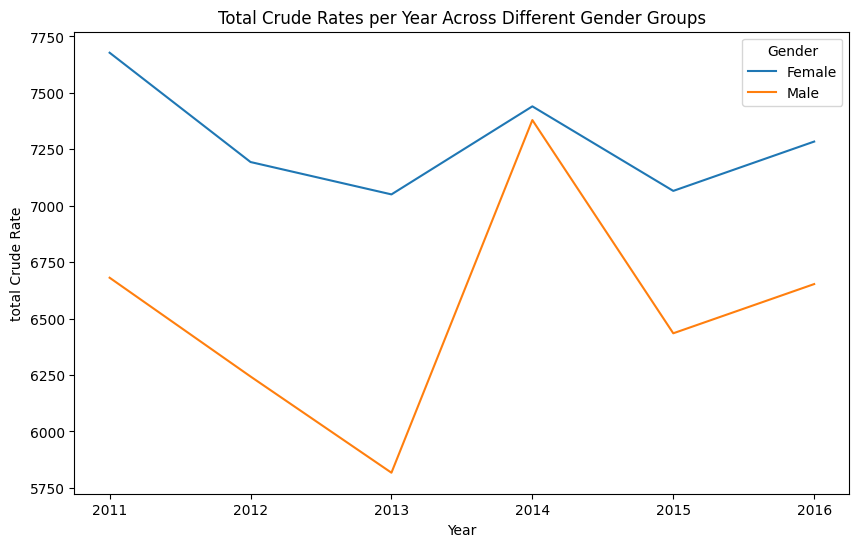

In [25]:
# Group the data by Year and Age Group, calculating the mean of the total death rate
grouped_df = df.groupby(['Year', 'Gender'])['total Crude Rate'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df, x='Year', y='total Crude Rate', hue='Gender')
plt.title('Total Crude Rates per Year Across Different Gender Groups')
plt.show()

In [ ]:
# data preprocessing
state = LabelEncoder().fit_transform(df['State'])
df.drop('State', axis = 1)
df['State'] = state

race = LabelEncoder().fit_transform(df['Race'])
df.drop('Race', axis = 1)
df['Race'] = race

gender = LabelEncoder().fit_transform(df['Gender'])
df.drop('Gender', axis = 1)
df['Gender'] = gender

df['Age Group Code'] = df['Age Group Code'].map({'25-34': 29.5,'35-44': 39.5, '45-54': 49.5, '55-64': 59.5, '65+': 82.5})
df

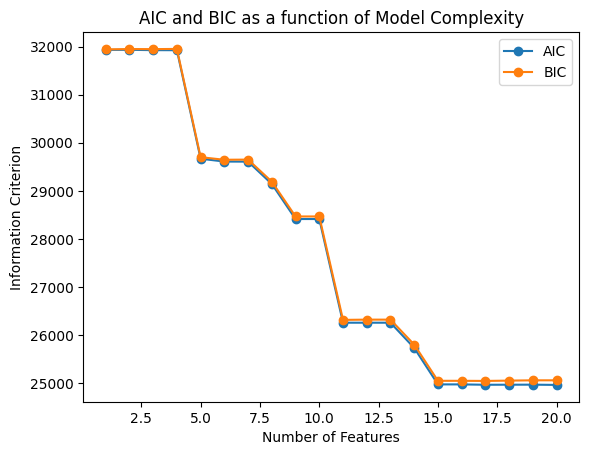

In [27]:
# using linear regression to predict the total crude rate
aic_values = []
bic_values = []

for num_features in range(1, 21):
    x_train = df.drop('total Crude Rate', axis = 1).iloc[:, :num_features]
    y_train = df['total Crude Rate']

    x_train = sm.add_constant(x_train)
    model_sm = sm.OLS(y_train, x_train)
    result = model_sm.fit()
    aic_values.append(result.aic)
    bic_values.append(result.bic)

plt.plot(range(1, 21), aic_values, marker='o', label='AIC')
plt.plot(range(1, 21), bic_values, marker='o', label='BIC')
plt.xlabel('Number of Features')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC as a function of Model Complexity')
plt.legend()
plt.show()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total Crude Rate   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     8884.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:03:51   Log-Likelihood:                -12464.
No. Observations:                1516   AIC:                         2.496e+04
Df Residuals:                    1498   BIC:                         2.506e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.649e+04   2.73e+04      0.604      0.546   -3.71e+04    7.01e+04
State                             0.7154      1.757      0.407      0.684      -2.731       4.161
Year                             -7.8415     13.597     -0.577      0.564     -34.513      18.830
Race                            151.6554     71.698      2.115      0.035      11.017     292.294
Gender                         -667.7277     96.427     -6.925      0.000    -856.874    -478.582
Age Group Code                   29.7933      3.586      8.308      0.000      22.759      36.827
heart disease Deaths             -7.0545      0.577    -12.235      0.000      -8.185      -5.924
heart disease Population         -0.0001   5.07e-05     -2.894      0.004      -0.000   -4.73e-05
heart disease Crude Rate          6.2386      0.299     20.887      0.000       5.653       6.824
breath Deaths                    -5.4239      0.253    -21.430      0.000      -5.920      -4.927
breath Population                -0.0002   4.63e-05     -3.424      0.001      -0.000   -6.78e-05
breath Crude Rate                 4.9045      0.111     44.349      0.000       4.688       5.121
cancer Deaths                    -1.3717      0.066    -20.920      0.000      -1.500      -1.243
cancer Population                -0.0002   4.63e-05     -3.423      0.001      -0.000   -6.77e-05
cancer Crude Rate                 1.7714      0.067     26.275      0.000       1.639       1.904
total Deaths                      1.0186      0.033     31.218      0.000       0.955       1.083
total Population                 -0.0003      0.000     -2.637      0.008      -0.001   -7.67e-05
Tobacco Use Rate              -3768.3462   1194.448     -3.155      0.002   -6111.314   -1425.378
Overweight (BMI 25.0-29.9)    -2.011e+04   7136.522     -2.818      0.005   -3.41e+04   -6114.982
Obese (BMI 30.0 - 99.8)       -1.909e+04   6622.086     -2.883      0.004   -3.21e+04   -6102.279
Normal Weight (BMI 18.5-24.9) -1.545e+04   5754.345     -2.685      0.007   -2.67e+04   -4160.306
==============================================================================
Omnibus:                      206.958   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2024.832
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       8.638   Cond. No.                     2.89e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 1.0, 'The top five predictors with the highest relevance')

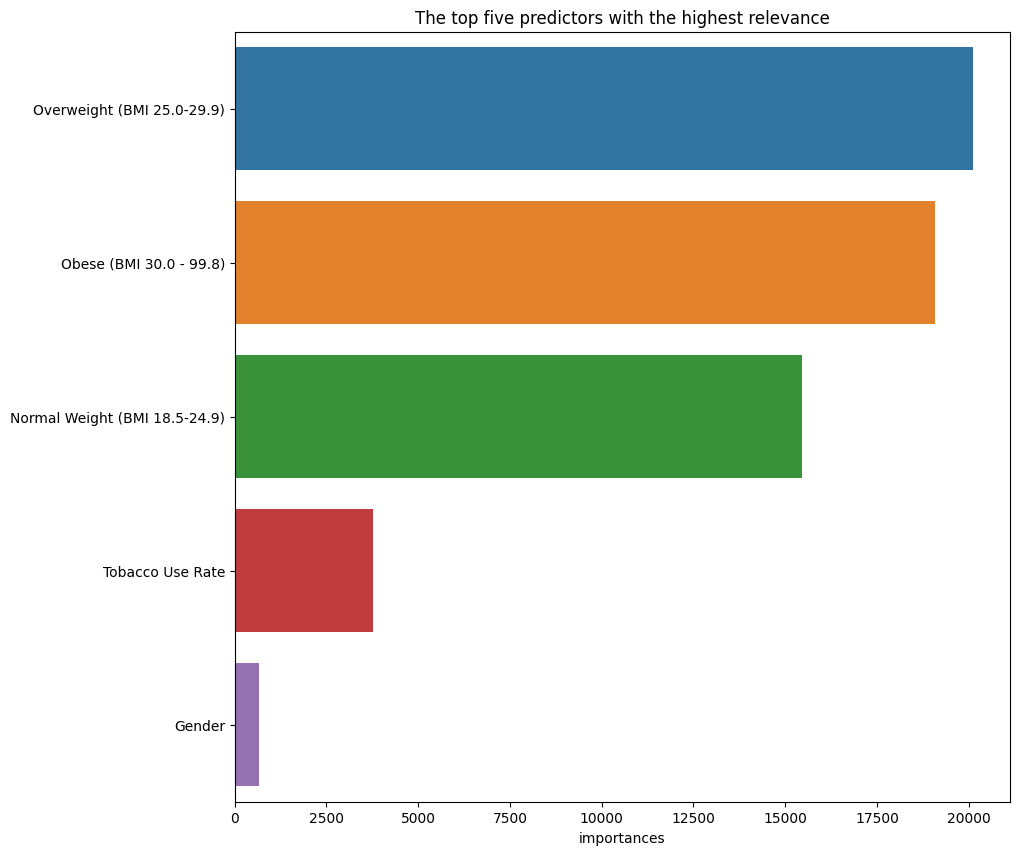

In [29]:
imp = result.params.T
fig = pd.DataFrame(abs(imp), x_train.columns, columns = ['importances'])
fig = fig.drop(['const'], axis=0)
fig = fig.sort_values(by = ['importances'], ascending = False).head(5)
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax = sns.barplot(x = fig['importances'], y = fig.index)
ax.set_title('The top five predictors with the highest relevance')